# Data Import

## News Article URL Import

In [1]:
!git clone https://github.com/fsminako/dissertation

Cloning into 'dissertation'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 99 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (99/99), 238.39 MiB | 18.67 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (48/48), done.


In [2]:
%ls dissertation/data/

bumi_resources_sustainability_report_2019.pdf           itm_sustainability_report_2013.pdf
bumi_resources_sustainability_report_2020.pdf           itm_sustainability_report_2014.pdf
bumi_resources_sustainability_report_2021.pdf           itm_sustainability_report_2015.pdf
bumi_resources_sustainability_report_2022.pdf           itm_sustainability_report_2016.pdf
bumi_resources_sustainability_report_2023.pdf           itm_sustainability_report_2017.pdf
cita_mineral_investindo_sustainability_report_2016.pdf  itm_sustainability_report_2018.pdf
cita_mineral_investindo_sustainability_report_2017.pdf  itm_sustainability_report_2019.pdf
cita_mineral_investindo_sustainability_report_2018.pdf  itm_sustainability_report_2020.pdf
cita_mineral_investindo_sustainability_report_2019.pdf  itm_sustainability_report_2021.pdf
cita_mineral_investindo_sustainability_report_2020.pdf  itm_sustainability_report_2022.pdf
cita_mineral_investindo_sustainability_report_2021.pdf  itm_sustainability_report_2023.pdf

In [3]:
import pandas as pd

In [4]:
df_url = pd.read_csv('dissertation/data/news_articles.csv')

In [5]:
df_url

,url
0,https://www.thejakartapost.com/indonesia/2024/...
1,https://www.thejakartapost.com/indonesia/2024/...
2,https://www.thejakartapost.com/indonesia/2024/...
3,https://www.thejakartapost.com/opinion/2024/06...
4,https://www.thejakartapost.com/indonesia/2024/...
...,...
337,https://www.thejakartapost.com/news/2018/01/13...
338,https://www.thejakartapost.com/news/2018/01/12...
339,https://www.thejakartapost.com/news/2018/01/03...
340,https://www.thejakartapost.com/news/2018/01/02...


## Articles Extraction

In [6]:
import requests
from bs4 import BeautifulSoup as bs
import os

In [7]:
output_dir = "dissertation/news_article"
os.makedirs(output_dir, exist_ok=True)

def fetch_article(url):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.content
    except requests.exceptions.RequestException as e:
        print(f"Error fetching article {url}: {e}")
        return None

def parse_article(content):
    soup = bs(content, 'html.parser')

    # Fetch the title
    title_tag = soup.find('h1', class_='tjp-title tjp-title--single')
    if title_tag:
        title = title_tag.text.strip()
    else:
        title = "Title not found"

    # Fetch the summary
    summary_tag = soup.find('p', class_='tjp-summary tjp-summary--single')
    if summary_tag:
        summary = summary_tag.text.strip()
    else:
        summary = ""

    # Fetch the opening
    opening_tag = soup.find('div', class_='tjp-opening')
    if opening_tag:
        opening = ''.join([element.text.strip() for element in opening_tag.find_all(['h1', 'p'])])
    else:
        opening = ""

    # Fetch the content
    paragraphs = []
    for p in soup.find_all("p"):
        if p.text.strip() and not p.find_parent('div', class_='tjp-single__content-ads') and not p.find_parent('div', class_='tjp-newsletter-box'):
            paragraphs.append(p.text.strip())

    if not paragraphs:
        content = ""
    else:
        content = ' '.join(paragraphs)

    # Combine summary, opening, and content into one
    full_content = ' '.join([summary, opening, content]).strip()
    if not full_content:
        full_content = "Article content not found"

    return title, full_content

# Iterate through the URLs and fetch the articles
for url in df_url['url']:
    content = fetch_article(url)
    if content:
        title, full_content = parse_article(content)
        # Save the article to a text file
        file_name = f"{title}.txt".replace(' ', '_').replace('/', '_')  # Ensure the file name is valid
        with open(os.path.join(output_dir, file_name), 'w', encoding='utf-8') as file:
            file.write(full_content)
    else:
        print(f"Failed to fetch or parse the article from {url}")

## Sentence Splitter

In [8]:
!pip install llama_index.core
!pip install llama_index.readers.file

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 7.5 MB/s eta 0:00:00


In [9]:
from llama_index.readers.file import FlatReader
from llama_index.core.node_parser import SentenceSplitter
from pathlib import Path

In [32]:
# Initialize the FlatReader
reader = FlatReader()

# Path to the directory containing the documents
directory_path = Path("dissertation/news_article/")

# Initialize an empty list to store the sentences and their file names
sentences = []

# Load data from all text files in the directory
for file_path in directory_path.glob("*.txt"):
    data = reader.load_data(file_path)
    for doc in data:
        # Initialize the SentenceSplitter for each document
        parser = SentenceSplitter(chunk_size=100, chunk_overlap=0)
        nodes = parser.get_nodes_from_documents([doc])
        for node in nodes:
            sentences.append({"file_name": file_path.name, "sentence": node})

# Create a DataFrame from the list of sentences
df = pd.DataFrame(sentences)

In [33]:
df

,file_name,sentence
0,Miners_call_for_more_government_support_amid_r...,Node ID: 1409a270-6a96-4056-9b7a-18727a34aa06\...
1,Miners_call_for_more_government_support_amid_r...,Node ID: b60bda8f-b2d9-49fe-af80-0662af4fec90\...
2,Miners_call_for_more_government_support_amid_r...,Node ID: 21b59797-6a5b-42ba-9ad3-e81a44605f0e\...
3,Miners_call_for_more_government_support_amid_r...,Node ID: 5305910e-faf7-4077-988a-8c6a089668e3\...
4,Miners_call_for_more_government_support_amid_r...,Node ID: 542a5f20-bd1b-4229-9bd8-0f79436215f5\...
...,...,...
5380,Analysis:_RI_adamant_on_upholding_downstream_p...,Node ID: 060278f6-dcb1-4c6e-b57c-7937faff9dbb\...
5381,Analysis:_RI_adamant_on_upholding_downstream_p...,Node ID: 73f520bd-aa18-493e-84bf-e95cde209392\...
5382,Analysis:_RI_adamant_on_upholding_downstream_p...,Node ID: 3a8df787-67d5-409c-aa5f-1314306ac366\...
5383,Analysis:_RI_adamant_on_upholding_downstream_p...,Node ID: 205ba732-35bf-4369-bf12-dccdef642069\...


In [34]:
# Function to extract text after "Text:"
def extract_text_after_text_column(entry):
    try:
        # Ensure the entry is a string
        entry = str(entry)
        return entry.split('Text:')[1].strip()
    except (IndexError, AttributeError):
        return None

# Apply the function to the 'sentence' column to create a new column 'extracted_text'
df['sentence'] = df['sentence'].apply(extract_text_after_text_column)

In [35]:
df

,file_name,sentence
0,Miners_call_for_more_government_support_amid_r...,They mentioned three main hurdles in the minin...
1,Miners_call_for_more_government_support_amid_r...,Agroup of top executives of foreign and local ...
2,Miners_call_for_more_government_support_amid_r...,A list of the most popular web browsers can be...
3,Miners_call_for_more_government_support_amid_r...,group of top executives of foreign and local m...
4,Miners_call_for_more_government_support_amid_r...,Deputy Energy and Mineral Resources Minister A...
...,...,...
5380,Analysis:_RI_adamant_on_upholding_downstream_p...,Additional sources assert that the downstream ...
5381,Analysis:_RI_adamant_on_upholding_downstream_p...,"By exerting control over nickel mines, they ga..."
5382,Analysis:_RI_adamant_on_upholding_downstream_p...,"A source claims, ""When examining the matter, i..."
5383,Analysis:_RI_adamant_on_upholding_downstream_p...,Disclaimer This content is provided by Tenggar...


# Data Pre-Processing

## Data Cleaning

In [14]:
import re

In [39]:
#Defining the cleaning function for the content column
def cleaning(text):
    if isinstance(text, str):
        url_pattern = re.compile(r'https://\S+|www\.\S+')
        text = url_pattern.sub('', text)
        text = re.sub(r"[’]", "'", text)
        text = re.sub(r"[^a-zA-Z\s'-]", "", text)
        text = ' '.join(text.split())
        text = text.lower()
    return text

df['sentence'] = df['sentence'].apply(lambda x: cleaning(x))

In [37]:
#Defining the cleaning function for the file name column
def cleaning_name(text):
    if isinstance(text, str):
        text = re.sub(r".txt", "", text)
        text = re.sub(r"[^a-zA-Z\s'-]", " ", text)
        text = text.lower()
    return text

df['file_name'] = df['file_name'].apply(lambda x: cleaning_name(x))

In [40]:
df

,file_name,sentence
0,miners call for more government support amid r...,they mentioned three main hurdles in the minin...
1,miners call for more government support amid r...,agroup of top executives of foreign and local ...
2,miners call for more government support amid r...,a list of the most popular web browsers can be...
3,miners call for more government support amid r...,group of top executives of foreign and local m...
4,miners call for more government support amid r...,deputy energy and mineral resources minister a...
...,...,...
5380,analysis ri adamant on upholding downstream p...,additional sources assert that the downstream ...
5381,analysis ri adamant on upholding downstream p...,by exerting control over nickel mines they gai...
5382,analysis ri adamant on upholding downstream p...,a source claims when examining the matter it b...
5383,analysis ri adamant on upholding downstream p...,disclaimer this content is provided by tenggar...


## Tokenisation

In [18]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.tokenize import word_tokenize
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords

In [20]:
stop_words = stopwords.words('english')

def tokenisation(text):
    if isinstance(text, str):
        # Tokenize the text
        words = word_tokenize(text)
        # Remove stopwords
        words = [word for word in words if word not in stop_words]
        # Rejoin the words into a single string
        text = ' '.join(words)
    return text

df['sentence'] = df['sentence'].apply(tokenisation)

In [21]:
df

,file_name,sentence
0,miners call for more government support amid r...,mentioned three main hurdles mining industry r...
1,miners call for more government support amid r...,agroup top executives foreign local mining fir...
2,miners call for more government support amid r...,list popular web browsers found click icons ge...
3,miners call for more government support amid r...,group top executives foreign local mining firm...
4,miners call for more government support amid r...,deputy energy mineral resources minister arcan...
...,...,...
5380,analysis ri adamant on upholding downstream p...,additional sources assert downstream policy al...
5381,analysis ri adamant on upholding downstream p...,exerting control nickel mines gain access pote...
5382,analysis ri adamant on upholding downstream p...,source claims examining matter becomes evident...
5383,analysis ri adamant on upholding downstream p...,disclaimer content provided tenggara strategic...


## Data Standardisation

In [22]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
def standardisation(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Stemming
    #stemmer = PorterStemmer()
    #words = [stemmer.stem(word) for word in words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

df['sentence'] = df['sentence'].apply(standardisation)

In [24]:
df

,file_name,sentence
0,miners call for more government support amid r...,mentioned three main hurdle mining industry ri...
1,miners call for more government support amid r...,agroup top executive foreign local mining firm...
2,miners call for more government support amid r...,list popular web browser found click icon get ...
3,miners call for more government support amid r...,group top executive foreign local mining firm ...
4,miners call for more government support amid r...,deputy energy mineral resource minister arcand...
...,...,...
5380,analysis ri adamant on upholding downstream p...,additional source assert downstream policy als...
5381,analysis ri adamant on upholding downstream p...,exerting control nickel mine gain access poten...
5382,analysis ri adamant on upholding downstream p...,source claim examining matter becomes evident ...
5383,analysis ri adamant on upholding downstream p...,disclaimer content provided tenggara strategic...


# Sentiment Analysis

In [25]:
%pip install transformers

In [26]:
from transformers import pipeline

In [27]:
sent_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [44]:
def get_sentiment_score(sentence):
    result = sent_pipeline(sentence)[0]
    return result['score'] if result['label'] == 'POSITIVE' else -result['score']

df['score'] = df['sentence'].apply(get_sentiment_score)

In [48]:
# Define a function to determine the label based on the score
def determine_label(score):
    return 'positive' if score > 0 else 'negative'

# Apply the function to create the 'label' column
df['label'] = df['score'].apply(determine_label)

In [49]:
df

,file_name,sentence,score,label
0,miners call for more government support amid r...,they mentioned three main hurdles in the minin...,-0.993791,negative
1,miners call for more government support amid r...,agroup of top executives of foreign and local ...,-0.999659,negative
2,miners call for more government support amid r...,a list of the most popular web browsers can be...,-0.997519,negative
3,miners call for more government support amid r...,group of top executives of foreign and local m...,0.893946,positive
4,miners call for more government support amid r...,deputy energy and mineral resources minister a...,-0.954524,negative
...,...,...,...,...
5380,analysis ri adamant on upholding downstream p...,additional sources assert that the downstream ...,0.972187,positive
5381,analysis ri adamant on upholding downstream p...,by exerting control over nickel mines they gai...,-0.983972,negative
5382,analysis ri adamant on upholding downstream p...,a source claims when examining the matter it b...,0.978596,positive
5383,analysis ri adamant on upholding downstream p...,disclaimer this content is provided by tenggar...,0.997061,positive


In [63]:
df.to_csv('dissertation/analysis_reult.csv', index=False)

# Data Visualisation

In [52]:
label_counts = df['label'].value_counts()

positive_count = label_counts.get('positive', 0)
negative_count = label_counts.get('negative', 0)

In [54]:
negative_count

3712

In [56]:
import matplotlib.pyplot as plt

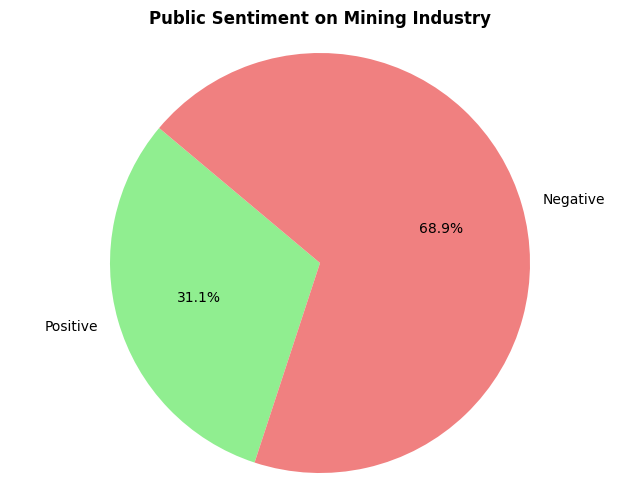

In [65]:
# Data for plotting
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=['lightgreen', 'lightcoral'], autopct='%1.1f%%', startangle=140)
plt.title('Public Sentiment on Mining Industry', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('sentiment_analysis_pie_chart.png')
plt.show()

